In [1]:
import numpy as np
from sklearn.datasets import load_iris
import numpy as np
import matplotlib.pyplot as plt

def standardise(x):
    return (x - np.mean(x, axis=0)) / np.std(x, axis=0)

class PCA():
    # x should have shape (samples, features)
    def cov_matrix(self, x):
        c = np.zeros((x.shape[1], x.shape[1]))
        means = np.sum(x, axis=0) / x.shape[0]
        means = means.reshape(-1, 1)
        for sample in x:
            sample = sample.reshape(-1, 1)
            c += (sample - means) @ (sample - means).T
        return (1 / (x.shape[0] - 1)) * c
    
    def fit(self, x):
        cov_matrix = self.cov_matrix(x)
        e_vals, e_vecs = np.linalg.eig(cov_matrix)
        # sort by eig_value in descending order
        idx = e_vals.argsort()[::-1]
        self.e_vals = e_vals[idx]
        self.e_vecs = e_vecs[:, idx]
            
    def transform(self, x, new_feature_dim):
        print(f"Transforming data from {x.shape[1]} dimensions to {new_feature_dim} dimensions.")
        print(f"New data has a variance of {round(sum(self.e_vals[:new_feature_dim]) / new_feature_dim, 2)}")
        print(f"New data keeps {round((sum(self.e_vals[:new_feature_dim]) / sum(self.e_vals)) * 100, 2)}% of the variance.")
        return x @ self.e_vecs[:,:new_feature_dim]
    
    
    def print_feature_importance(self):
        feature_scores = np.zeros((self.e_vecs.shape[0]))
        for col_idx in range(self.e_vecs.shape[1]):
            e_vec = self.e_vecs[:,col_idx]
            desc = e_vec.argsort()[::-1]
            print(f"For PC{col_idx + 1} the most important feature in descending order are: {desc}.")
            
        
dataset = load_iris()
x, y = dataset.data, dataset.target

# Before applying PCA it's important to standardize the dataset so all features have a mean of 0
# Another way to ensure the features have a mean of 0 is to just subtract each data point 
# mean by it's features mean
x = standardise(x)

pca = PCA()
pca.fit(x)
x = pca.transform(x, 2)

Transforming data from 4 dimensions to 2 dimensions.
New data has a variance of 1.93
New data keeps 95.81% of the variance.


In [2]:
pca.print_feature_importance()

For PC1 the most important feature in descending order are: [2 3 0 1]
For PC2 the most important feature in descending order are: [2 3 0 1]
For PC3 the most important feature in descending order are: [3 1 2 0]
For PC4 the most important feature in descending order are: [3 0 1 2]


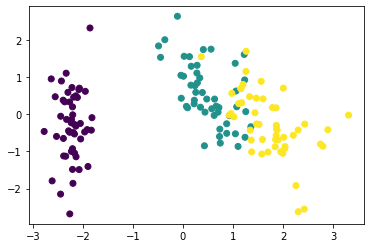

In [3]:
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()